In [1]:
%matplotlib inline                  
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from numpy import *
import time
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({'font.size': 18})

def calcdrifttheory(v,r,tau,delay,base):
    dv = np.gradient(v,base)
    return tau/2*(1-delay/tau)*v*dv+tau*v**2/r

def calcvelocity2(boundaryradius):
    rrange = np.linspace(0,boundaryradius,100)
    intensity2 = Imax*lorentz(rrange,Ichar)#Imax*np.exp(-rrange/Ichar)
    return rrange, (vmax-vmin)*np.exp(-intensity2/Ic)+vmin

def lorentz(x,sigma): return sigma**2/(x**2+sigma**2)

In [2]:
start = '0'
end = '11'
folder = '.'

datageneral = np.loadtxt(r''+str(folder)+'/DataGeneral/DataGeneral'+str(start)+'.txt')
dt = datageneral[0]
boundaryradius = datageneral[1]
Imax = 0.4    #datageneral[9]
Ichar = 0.35  #datageneral[10]
Ic = 0.09     #datageneral[8]
vmax = 0.6    #datageneral[4]
vmin = 0.03   #datageneral[3]

In [13]:
data = np.loadtxt(r''+str(folder)+'/DataRadial/DataRadial'+str(start)+'.txt')
maxlength = len(data)
data = np.asarray(data)
radius = data[:,0]
num = int(end)-int(start)
numorig = num

rangewave = np.zeros(num)
for i in range(num):
    rangewave[i] = 10*i-50
delaywave = np.zeros(len(rangewave))

vdifference = np.zeros((maxlength,num))   

delaywave2 = np.zeros(len(rangewave))
for i in range(len(rangewave)):
    delaywave2[i] = dt*rangewave[i]

alltogether = np.zeros((maxlength*len(rangewave),11))
delaywave = np.zeros(len(rangewave))
meandensity = np.zeros(num);meandistance = np.zeros(num);out = np.zeros(num);vmaxmeasured=np.zeros(num)
reorientationtime = np.zeros(num)
count = 0
for i in range(num):  
    number = int(int(start)+i)
    #data = np.loadtxt(r''+str(folder)+'/DataComparerInAndOut/DataComparerInAndOut'+str(number)+'.txt')
    data3 = np.loadtxt(r''+str(folder)+'/DataRadial/DataRadial'+str(number)+'.txt')
    #0 - distance; 1 - velocity; 2 - velo err; 3 - probability; 4 - v difference; 5 - v diff err, 6 - drift, 7 - drift err
    #data = np.asarray(data)
    data3 = np.asarray(data3)
    radius2 = data3[:,0]
    vdifference1 = data3[:,4]
    proba = data3[:,3]

    vdifference[:,i] = vdifference1
    #0 - mean distance, 1 - # of paths, 2 - inside, 3 - noise, 4 - delay, 5 - reorientationtime, 6 - mean of the probability, 7 - max v
    data2 = np.loadtxt(r''+str(folder)+'/DataImportant/DataImportant'+str(number)+'.txt')
    meandensity[i] = data2[6]
    meandistance[i] = data2[0]
    out[i] = data2[2]
    vmaxmeasured[i] = data2[7]
    reorientationtime[i] = data2[5]

    alltogether[count:count+maxlength,0] = radius2
    alltogether[count:count+maxlength,1] = rangewave[i]
    alltogether[count:count+maxlength,2] = vdifference1
    alltogether[count:count+maxlength,3] = delaywave2[i]
    alltogether[count:count+maxlength,4] = proba
    alltogether[count:count+maxlength,5] = data3[:,3]
    alltogether[count:count+maxlength,6] = data3[:,3]/max(data3[:,3])
    #alltogether[count:count+maxlength,7] = data3[:,5]
    alltogether[count:count+maxlength,8] = data3[:,1]
    alltogether[count:count+maxlength,9] = data3[:,6]
    alltogether[count:count+maxlength,10] = data3[:,7]
    count += maxlength
        
#for j in range(maxlength*len(rangewave)):
#    for i in range(5):
#        if alltogether[j,i] == 0: alltogether[j,i] = np.nan

In [26]:
np.nansum(alltogether[maxlength*0:maxlength*0+maxlength,2])

1.4386589999999999

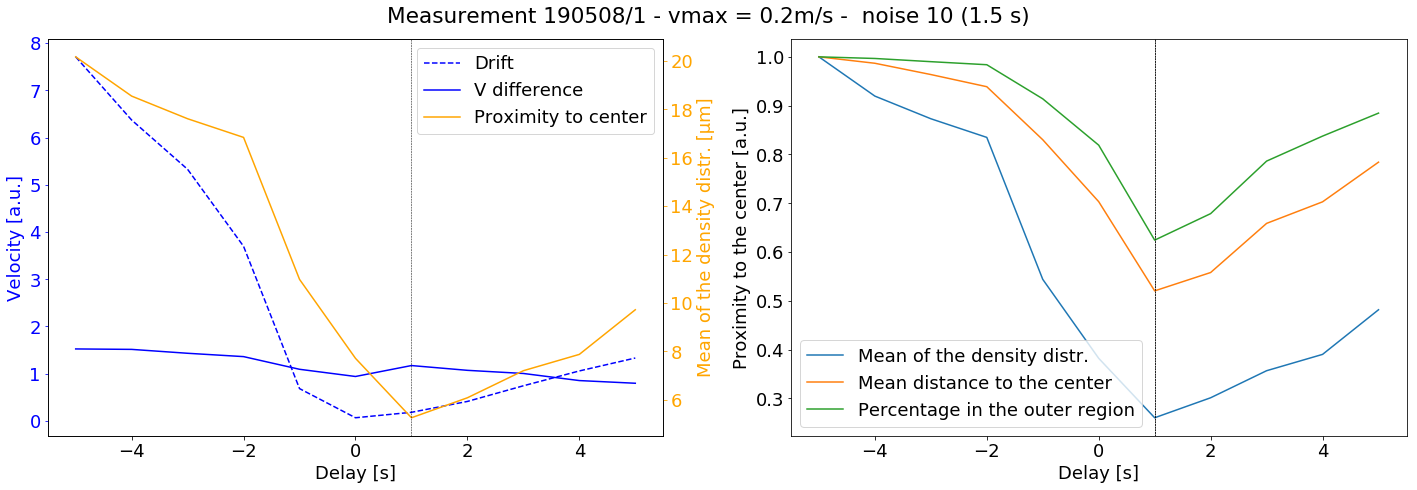

In [27]:
test = np.zeros((numorig,3))
bla = np.zeros((maxlength,numorig))
for i in range(numorig):
    test[i,0] = np.nansum(alltogether[maxlength*i:maxlength*i+maxlength,2])
    #test[i,1] = sum(alltogether[maxlength*i:numorig*i+maxlength,4])
    test[i,2] = np.nanmax(alltogether[maxlength*i:maxlength*i+maxlength,8])-np.nanmin(alltogether[maxlength*i:maxlength*i+maxlength,8])
    bla[:,i] = alltogether[maxlength*i:maxlength*i+maxlength,0]
    #print(maxlength*i,' - ', numorig*i+maxlength-1)
    #print(test[i,0])
vdrift = test[:,0]/vmaxmeasured
vdiff = test[:,2]/vmaxmeasured
    
fig = plt.subplots(figsize=(20,7))
ax1 = plt.subplot(121)
line1 = ax1.plot(delaywave2,vdrift, color='b',linestyle='--',label='Drift')
line2 = ax1.plot(delaywave2,vdiff, color='b',label = 'V difference')
ins = 1 - out
ax1.set_xlabel('Delay [s]')#
ax1.set_ylabel('Velocity [a.u.]', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title(' ')

ax2 = ax1.twinx()
line3 = ax2.plot(delaywave2,meandensity, color='orange',label='Proximity to center')
plt.axvline(x=delaywave2[int(np.argmin(meandensity))],linewidth=0.5, color = 'k',linestyle='--')
ax2.set_xlabel('Delay [s]')#
ax2.set_ylabel('Mean of the density distr. [µm]', color='orange')
ax2.tick_params('y', colors='orange')
lns = line1+line2+line3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

ax3 = plt.subplot(122)
plt.plot(delaywave2,meandensity/max(meandensity),label = 'Mean of the density distr.')
plt.axvline(x=delaywave2[int(np.argmin(meandensity))],linewidth=0.5, color = 'k',linestyle='--')
plt.plot(delaywave2,meandistance/max(meandistance),label = 'Mean distance to the center')
plt.axvline(x=delaywave2[int(np.argmin(meandistance))],linewidth=0.5, color = 'k',linestyle='--')
plt.plot(delaywave2,ins/max(ins),label = 'Percentage in the outer region')
plt.axvline(x=delaywave2[int(np.argmin(ins))],linewidth=0.5, color = 'k',linestyle='--')
plt.ylabel('Proximity to the center [a.u.]')
plt.xlabel('Delay [s]')#
plt.legend()
ax3.set_title(' ')
plt.suptitle('Measurement 190508/1 - vmax = '+str(round(mean(vmaxmeasured),1))+'m/s -  noise 10 ('+str(round(mean(reorientationtime),1))+' s)')

plt.tight_layout()
plt.savefig('Theory for Aproximity to center.pdf', format='pdf')
plt.show()

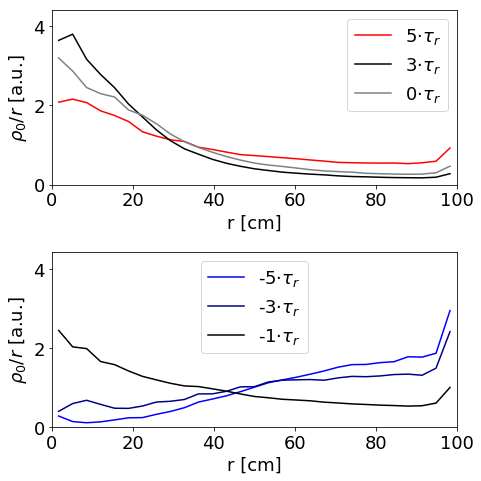

In [11]:
colorwave = cm.plasma(np.linspace(0, 1, numorig))

fig = plt.subplots(figsize=(7,7))
plt.subplot(211)
i = 10
plt.plot(radius2*100,alltogether[maxlength*i:maxlength*i+maxlength,5],color='red',label = r'5$\cdot \tau_{r}$')
i = 8
plt.plot(radius2*100,alltogether[maxlength*i:maxlength*i+maxlength,5],color='k',label = r'3$\cdot \tau_{r}$')
i = 5
plt.plot(radius2*100,alltogether[maxlength*i:maxlength*i+maxlength,5],color='grey',label = r'0$\cdot \tau_{r}$')
plt.xlabel('r [cm]')
plt.ylabel(r'$\rho_{0}/r$ [a.u.]')
plt.xlim([0,100])
plt.ylim([0,np.nanmax(alltogether[:,5])])
plt.legend()

ax2 = plt.subplot(212)
i = 0
plt.plot(radius2*100,alltogether[maxlength*i:maxlength*i+maxlength,5],color='blue',label = r'-5$\cdot \tau_{r}$')
i = 2
plt.plot(radius2*100,alltogether[maxlength*i:maxlength*i+maxlength,5],color='darkblue',label = r'-3$\cdot \tau_{r}$')
i = 4
plt.plot(radius2*100,alltogether[maxlength*i:maxlength*i+maxlength,5],color='black',label = r'-1$\cdot \tau_{r}$')
plt.xlabel('r [cm]')
plt.ylabel(r'$\rho_{0}/r$ [a.u.]')
plt.xlim([0,100])
plt.ylim([0,np.nanmax(alltogether[:,5])])
plt.legend()

plt.tight_layout()
plt.savefig('Compare to Volpe.pdf', format='pdf')
plt.show()

/Users/alex/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in true_divide


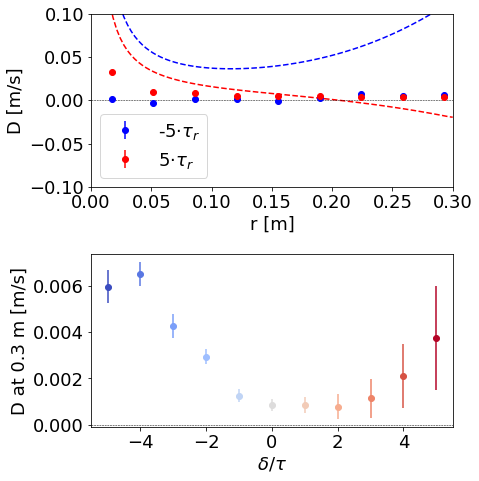

In [12]:
plotlength = 9
base = radius2[2] - radius2[1]
dd = []; v = []
i = 8
ddistance = np.zeros((num,2))
for j in range(num):
    ddistance[j,0] = alltogether[maxlength*j+i,9]
    ddistance[j,1] = alltogether[maxlength*j+i,10]

fig = plt.subplots(figsize=(7,7))
plt.subplot(211)
i = 0
y = alltogether[maxlength*i:maxlength*i+plotlength,9]
yerr = alltogether[maxlength*i:maxlength*i+plotlength,10]
x = radius2[:plotlength]
plt.errorbar(x,y,yerr=yerr,color='blue',label = r'-5$\cdot \tau_{r}$', fmt='o')
dd, v = calcvelocity2(0.3)
drifttheory = calcdrifttheory(v,dd,reorientationtime[i],delaywave2[i],dd[1])
plt.plot(dd,drifttheory,'b--')#*max(y/max(drifttheory))
i = 10
y = alltogether[maxlength*i:maxlength*i+plotlength,9]
yerr = alltogether[maxlength*i:maxlength*i+plotlength,10]
x = radius2[:plotlength]
plt.errorbar(x,y,yerr=yerr,color='red',label = r'5$\cdot \tau_{r}$', fmt='o')
drifttheory = calcdrifttheory(v,dd,reorientationtime[i],delaywave2[i],dd[1])
plt.plot(dd,drifttheory,'r--')#*max(y/max(drifttheory))
plt.xlabel('r [m]')
plt.ylabel('D [m/s]')
plt.axhline(y=0,linewidth=0.5, color = 'k',linestyle='--')
plt.xlim([0,0.3])
plt.ylim([-0.1,0.1])
plt.legend()

plt.subplot(212)
colorwave = cm.coolwarm(np.linspace(0, 1, num))
for i in range(num):
    plt.errorbar(delaywave2[i],ddistance[i,0],yerr=ddistance[i,1], fmt='o',color=colorwave[i])
plt.axhline(y=0,linewidth=0.5, color = 'k',linestyle='--')
plt.xlabel(r'$\delta/\tau$')
plt.ylabel('D at 0.3 m [m/s]')
plt.tight_layout()
plt.savefig('Compare to Volpe 2.pdf', format='pdf')
plt.show()

In [9]:
i = 0
print(alltogether[maxlength*i:maxlength*i+plotlength,9])

[ 0.002112  0.000785  0.000602  0.001252  0.002179  0.003856  0.005469
  0.006663  0.006596]


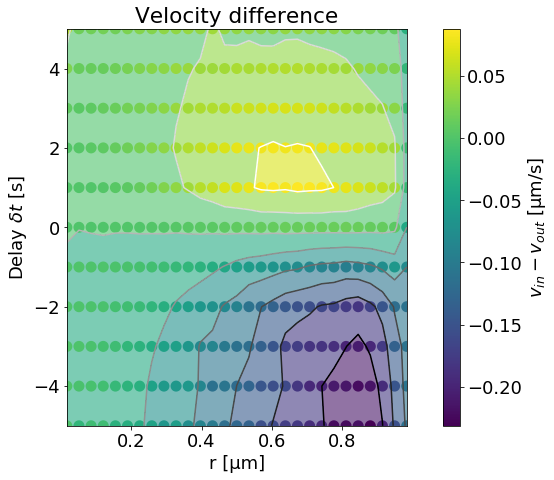

delay =  1.0 s - r =  0.672414 µm  -  max v diff = 0.09 µm/s


In [13]:
border = False
dots = True
both = False
colormap = 'viridis'   #viridis
value = 0.05

start = 0; end = len(alltogether)
num= end - start
xdots = alltogether[:,0]
ydots = alltogether[:,3]
y2dots = alltogether[:,1]
vdots = alltogether[:,2]

count = 0; x = []; x.append(xdots[0])
count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
for i in range(len(xdots)):
    if xdots[i] > x[count]:
        x.append(xdots[i])
        count +=1
    if ydots[i] > y[count2]:
        y.append(ydots[i])
        y2.append(y2dots[i])
        count2 +=1
xlength = len(x); ylength = len(y)
z = np.zeros((ylength,xlength)); count = 0
for j in range(ylength):
    for i in range(xlength):
        if count < num:
            z[j,i] = vdots[count]
            #print('dist = ',x[i],' delay = ',round(y[j],2),' vdiff = ',round(vdots[count],1),'   --   dist = ',alltogether[count,0],' delay = ',round(alltogether[count,3],2),' vdiff = ',round(alltogether[count,2],1))
            count += 1
        if count > num: z[j,i] = np.nan

if dots == True: 
    if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
else: fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
plt.title('Velocity difference')
if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
im = ax.contour(x,y,z,cmap='gray')
ax.set_xlabel('r [µm]')#
ax.set_ylabel('Delay $\delta t$ [s]')
ax.tick_params(axis='y')
if border == True:
    ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
    ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])

if dots == True:
    im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
    if border == False:
        ax.set_ylim([min(ydots),max(ydots)])
        ax.set_xlim([min(xdots),max(xdots)])
    else:
        ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
        ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])

if both == True:
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
    im2 = ax2.contour(x,y2,z,cmap='gray')
    ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    if border == True:
        ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
        ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
    pad1 = 1      
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=1)
    plt.colorbar(im, cax=cax2)
else: pad1 = 0.5        
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=pad1)
plt.colorbar(im, cax=cax)
plt.ylabel('$v_{in} - v_{out}$ [µm/s]')  
plt.tight_layout()
plt.savefig('vdifference.pdf', format='pdf')
plt.savefig('vdifference.svg', format='svg')
plt.show()

for i in range(len(vdots)):
    if vdots[i] == max(vdots[:]):        
        print('delay = ',round(ydots[i],2),'s - r = ',xdots[i],'µm  -  max v diff =',round(max(vdots),2),'µm/s')

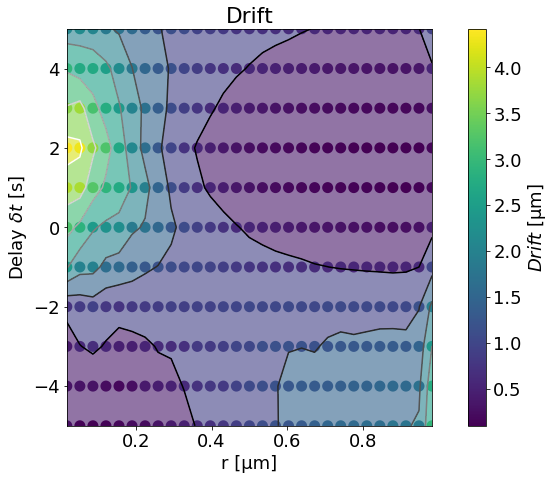

delay =  2.0 s - r =  0.017241 µm  -  max drift = 4.42 µm/s


In [14]:
border = False
dots = True
both = False
colormap = 'viridis'   #viridis
value = 0.05

start = 0; end = len(alltogether)
num= end - start
xdots = alltogether[:,0]
ydots = alltogether[:,3]
y2dots = alltogether[:,1]
vdots = alltogether[:,4]

count = 0; x = []; x.append(xdots[0])
count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
for i in range(len(xdots)):
    if xdots[i] > x[count]:
        x.append(xdots[i])
        count +=1
    if ydots[i] > y[count2]:
        y.append(ydots[i])
        y2.append(y2dots[i])
        count2 +=1
xlength = len(x); ylength = len(y)
z = np.zeros((ylength,xlength)); count = 0
for j in range(ylength):
    for i in range(xlength):
        if count < num:
            z[j,i] = vdots[count]
            #print('dist = ',x[i],' delay = ',round(y[j],2),' vdiff = ',round(vdots[count],1),'   --   dist = ',alltogether[count,0],' delay = ',round(alltogether[count,3],2),' vdiff = ',round(alltogether[count,2],1))
            count += 1
        if count > num: z[j,i] = np.nan

if dots == True: 
    if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
else: fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
plt.title('Drift')
if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
im = ax.contour(x,y,z,cmap='gray')
ax.set_xlabel('r [µm]')#
ax.set_ylabel('Delay $\delta t$ [s]')
ax.tick_params(axis='y')
if border == True:
    ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
    ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])

if dots == True:
    im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
    if border == False:
        ax.set_ylim([min(ydots),max(ydots)])
        ax.set_xlim([min(xdots),max(xdots)])
    else:
        ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
        ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])

if both == True:
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
    im2 = ax2.contour(x,y2,z,cmap='gray')
    ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    if border == True:
        ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
        ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
    pad1 = 1      
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=1)
    plt.colorbar(im, cax=cax2)
else: pad1 = 0.5        
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=pad1)
plt.colorbar(im, cax=cax)
plt.ylabel('$Drift$ [µm]')
plt.tight_layout()
plt.savefig('Drift.pdf', format='pdf')
plt.savefig('Drift.svg', format='svg')
plt.show()

for i in range(len(vdots)):
    if vdots[i] == max(vdots[:]):        
        print('delay = ',round(ydots[i],2),'s - r = ',xdots[i],'µm  -  max drift =',round(max(vdots),2),'µm/s')

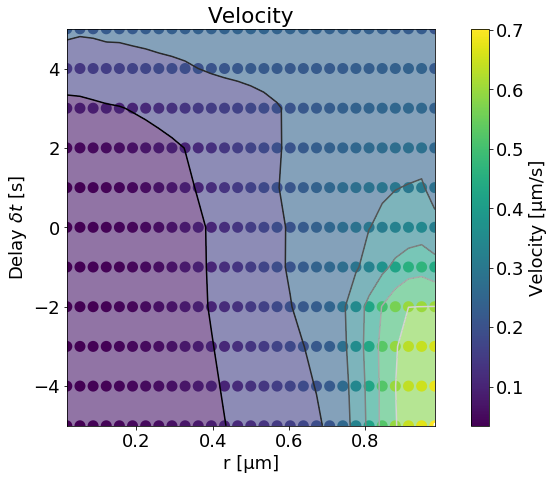

In [57]:
border = False
dots = True
both = False
colormap = 'viridis'   #viridis
value = 0.05

start = 0; end = len(alltogether)
num= end - start
xdots = alltogether[:,0]
ydots = alltogether[:,3]
y2dots = alltogether[:,1]
vdots = alltogether[:,8]

count = 0; x = []; x.append(xdots[0])
count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
for i in range(len(xdots)):
    if xdots[i] > x[count]:
        x.append(xdots[i])
        count +=1
    if ydots[i] > y[count2]:
        y.append(ydots[i])
        y2.append(y2dots[i])
        count2 +=1
xlength = len(x); ylength = len(y)
z = np.zeros((ylength,xlength)); count = 0
for j in range(ylength):
    for i in range(xlength):
        if count < num:
            z[j,i] = vdots[count]
            #print('dist = ',x[i],' delay = ',round(y[j],2),' vdiff = ',round(vdots[count],1),'   --   dist = ',alltogether[count,0],' delay = ',round(alltogether[count,3],2),' vdiff = ',round(alltogether[count,2],1))
            count += 1
        if count > num: z[j,i] = np.nan

if dots == True: 
    if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
else: fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
plt.title('Velocity')
if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
im = ax.contour(x,y,z,cmap='gray')
ax.set_xlabel('r [µm]')#
ax.set_ylabel('Delay $\delta t$ [s]')
ax.tick_params(axis='y')
if border == True:
    ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
    ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])

if dots == True:
    im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
    if border == False:
        ax.set_ylim([min(ydots),max(ydots)])
        ax.set_xlim([min(xdots),max(xdots)])
    else:
        ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
        ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])

if both == True:
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
    im2 = ax2.contour(x,y2,z,cmap='gray')
    ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    if border == True:
        ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
        ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
    pad1 = 1      
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=1)
    plt.colorbar(im, cax=cax2)
else: pad1 = 0.5        
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=pad1)
plt.colorbar(im, cax=cax)
plt.ylabel('Velocity [µm/s]')
plt.tight_layout()
plt.savefig('Velocity.pdf', format='pdf')
plt.savefig('Velocity.svg', format='svg')
plt.show()

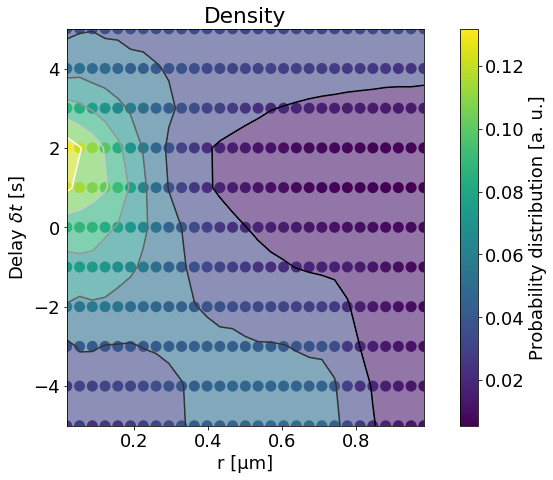

delay =  2.0 s - r =  0.017241 µm  -  max probability = 0.13 µm/s


In [58]:
border = False
dots = True
both = False
colormap = 'viridis'   #viridis
value = 0.05

start = 0; end = len(alltogether)
num= end - start
xdots = alltogether[:,0]
ydots = alltogether[:,3]
y2dots = alltogether[:,1]
vdots = alltogether[:,5]

count = 0; x = []; x.append(xdots[0])
count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
for i in range(len(xdots)):
    if xdots[i] > x[count]:
        x.append(xdots[i])
        count +=1
    if ydots[i] > y[count2]:
        y.append(ydots[i])
        y2.append(y2dots[i])
        count2 +=1
xlength = len(x); ylength = len(y)
z = np.zeros((ylength,xlength)); count = 0
for j in range(ylength):
    for i in range(xlength):
        if count < num:
            z[j,i] = vdots[count]
            #print('dist = ',x[i],' delay = ',round(y[j],2),' vdiff = ',round(vdots[count],1),'   --   dist = ',alltogether[count,0],' delay = ',round(alltogether[count,3],2),' vdiff = ',round(alltogether[count,2],1))
            count += 1
        if count > num: z[j,i] = np.nan

if dots == True: 
    if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
else: fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
plt.title('Density')
if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
im = ax.contour(x,y,z,cmap='gray')
ax.set_xlabel('r [µm]')#
ax.set_ylabel('Delay $\delta t$ [s]')
ax.tick_params(axis='y')
if border == True:
    ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
    ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])

if dots == True:
    im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
    if border == False:
        ax.set_ylim([min(ydots),max(ydots)])
        ax.set_xlim([min(xdots),max(xdots)])
    else:
        ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
        ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])

if both == True:
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
    im2 = ax2.contour(x,y2,z,cmap='gray')
    ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    if border == True:
        ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
        ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
    pad1 = 1      
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=1)
    plt.colorbar(im, cax=cax2)
else: pad1 = 0.5        
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=pad1)
plt.colorbar(im, cax=cax)
plt.ylabel('Probability distribution [a. u.]')
plt.tight_layout()
plt.savefig('Density.pdf', format='pdf')
plt.savefig('Density.svg', format='svg')
plt.show()

for i in range(len(vdots)):
    if vdots[i] == max(vdots[:]):        
        print('delay = ',round(ydots[i],2),'s - r = ',xdots[i],'µm  -  max probability =',round(max(vdots),2),'µm/s')

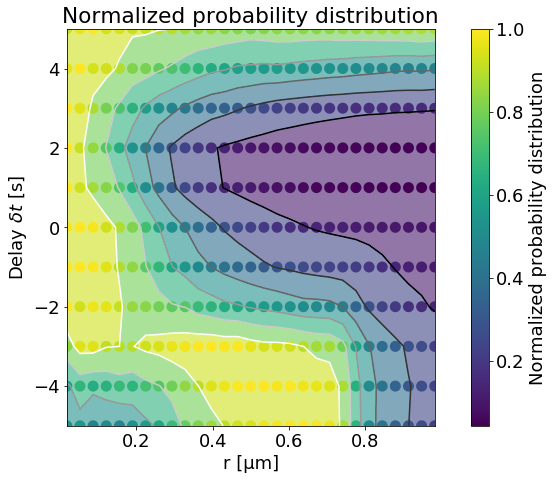

In [59]:
border = False
dots = True
both = False
colormap = 'viridis'   #viridis
value = 0.05

start = 0; end = len(alltogether)
num= end - start
xdots = alltogether[:,0]
ydots = alltogether[:,3]
y2dots = alltogether[:,1]
vdots = alltogether[:,6]

count = 0; x = []; x.append(xdots[0])
count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
for i in range(len(xdots)):
    if xdots[i] > x[count]:
        x.append(xdots[i])
        count +=1
    if ydots[i] > y[count2]:
        y.append(ydots[i])
        y2.append(y2dots[i])
        count2 +=1
xlength = len(x); ylength = len(y)
z = np.zeros((ylength,xlength)); count = 0
for j in range(ylength):
    for i in range(xlength):
        if count < num:
            z[j,i] = vdots[count]
            #print('dist = ',x[i],' delay = ',round(y[j],2),' vdiff = ',round(vdots[count],1),'   --   dist = ',alltogether[count,0],' delay = ',round(alltogether[count,3],2),' vdiff = ',round(alltogether[count,2],1))
            count += 1
        if count > num: z[j,i] = np.nan

if dots == True: 
    if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
else: fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
plt.title('Normalized probability distribution')
if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
im = ax.contour(x,y,z,cmap='gray')
ax.set_xlabel('r [µm]')#
ax.set_ylabel('Delay $\delta t$ [s]')
ax.tick_params(axis='y')
if border == True:
    ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
    ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])

if dots == True:
    im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
    if border == False:
        ax.set_ylim([min(ydots),max(ydots)])
        ax.set_xlim([min(xdots),max(xdots)])
    else:
        ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
        ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])

if both == True:
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
    im2 = ax2.contour(x,y2,z,cmap='gray')
    ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    if border == True:
        ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
        ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
    pad1 = 1      
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=1)
    plt.colorbar(im, cax=cax2)
else: pad1 = 0.5        
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=pad1)
plt.colorbar(im, cax=cax)
plt.ylabel('Normalized probability distribution')
plt.tight_layout()
plt.savefig('Norm Density.pdf', format='pdf')
plt.savefig('Norm Density.svg', format='svg')
plt.show()

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


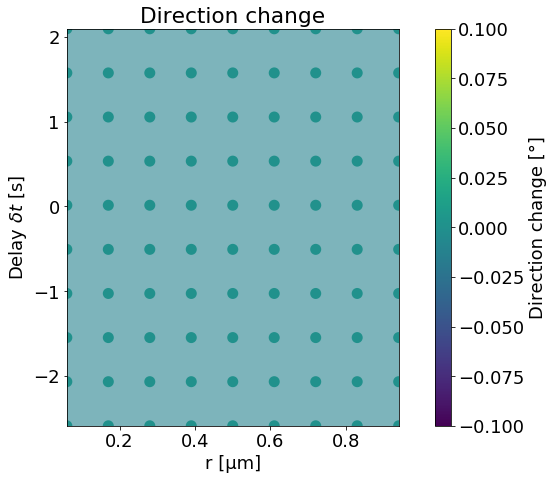

In [21]:
border = False
dots = True
both = False
colormap = 'viridis'   #viridis
value = 0.05

start = 0; end = len(alltogether)
num= end - start
xdots = alltogether[:,0]
ydots = alltogether[:,3]
y2dots = alltogether[:,1]
vdots = alltogether[:,7]

count = 0; x = []; x.append(xdots[0])
count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
for i in range(len(xdots)):
    if xdots[i] > x[count]:
        x.append(xdots[i])
        count +=1
    if ydots[i] > y[count2]:
        y.append(ydots[i])
        y2.append(y2dots[i])
        count2 +=1
xlength = len(x); ylength = len(y)
z = np.zeros((ylength,xlength)); count = 0
for j in range(ylength):
    for i in range(xlength):
        if count < num:
            z[j,i] = vdots[count]
            #print('dist = ',x[i],' delay = ',round(y[j],2),' vdiff = ',round(vdots[count],1),'   --   dist = ',alltogether[count,0],' delay = ',round(alltogether[count,3],2),' vdiff = ',round(alltogether[count,2],1))
            count += 1
        if count > num: z[j,i] = np.nan

if dots == True: 
    if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
else: fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
plt.title('Direction change')
if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
im = ax.contour(x,y,z,cmap='gray')
ax.set_xlabel('r [µm]')#
ax.set_ylabel('Delay $\delta t$ [s]')
ax.tick_params(axis='y')
if border == True:
    ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
    ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])

if dots == True:
    im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
    if border == False:
        ax.set_ylim([min(ydots),max(ydots)])
        ax.set_xlim([min(xdots),max(xdots)])
    else:
        ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
        ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])

if both == True:
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
    im2 = ax2.contour(x,y2,z,cmap='gray')
    ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    if border == True:
        ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
        ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
    pad1 = 1      
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=1)
    plt.colorbar(im, cax=cax2)
else: pad1 = 0.5        
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=pad1)
plt.colorbar(im, cax=cax)
plt.ylabel('Direction change [°]')
plt.tight_layout()
plt.savefig('Directionchange.pdf', format='pdf')
plt.savefig('Directionchange.svg', format='svg')
plt.show()

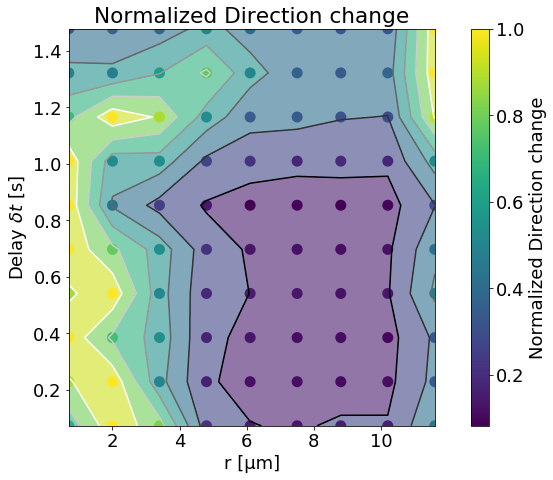

In [10]:
border = False
dots = True
both = False
colormap = 'viridis'   #viridis
value = 0.05

start = 0; end = len(alltogether)
num= end - start
xdots = alltogether[:,0]
ydots = alltogether[:,3]
y2dots = alltogether[:,1]
vdots = alltogether[:,7]

count = 0; x = []; x.append(xdots[0])
count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
for i in range(len(xdots)):
    if xdots[i] > x[count]:
        x.append(xdots[i])
        count +=1
    if ydots[i] > y[count2]:
        y.append(ydots[i])
        y2.append(y2dots[i])
        count2 +=1
xlength = len(x); ylength = len(y)
z = np.zeros((ylength,xlength)); count = 0
for i in range(ylength):
    vdots[i*xlength:i*xlength+xlength] /= max(vdots[i*xlength:i*xlength+xlength])

for j in range(ylength):
    for i in range(xlength):
        if count < num:
            z[j,i] = vdots[count]
            #print('dist = ',x[i],' delay = ',round(y[j],2),' vdiff = ',round(vdots[count],1),'   --   dist = ',alltogether[count,0],' delay = ',round(alltogether[count,3],2),' vdiff = ',round(alltogether[count,2],1))
            count += 1
        if count > num: z[j,i] = np.nan
#for i in range(ylength):
#    z[i,:] /= max(z[i,:])
            
if dots == True: 
    if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
else: fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
plt.title('Normalized Direction change')
if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
im = ax.contour(x,y,z,cmap='gray')
ax.set_xlabel('r [µm]')#
ax.set_ylabel('Delay $\delta t$ [s]')
ax.tick_params(axis='y')
if border == True:
    ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
    ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])

if dots == True:
    im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
    if border == False:
        ax.set_ylim([min(ydots),max(ydots)])
        ax.set_xlim([min(xdots),max(xdots)])
    else:
        ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
        ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])

if both == True:
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
    im2 = ax2.contour(x,y2,z,cmap='gray')
    ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    if border == True:
        ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
        ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
    pad1 = 1      
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=1)
    plt.colorbar(im, cax=cax2)
else: pad1 = 0.5        
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=pad1)
plt.colorbar(im, cax=cax)
plt.ylabel('Normalized Direction change')
plt.tight_layout()
plt.savefig('Directionchange normalized.pdf', format='pdf')
plt.savefig('Directionchange normalized.svg', format='svg')
plt.show()

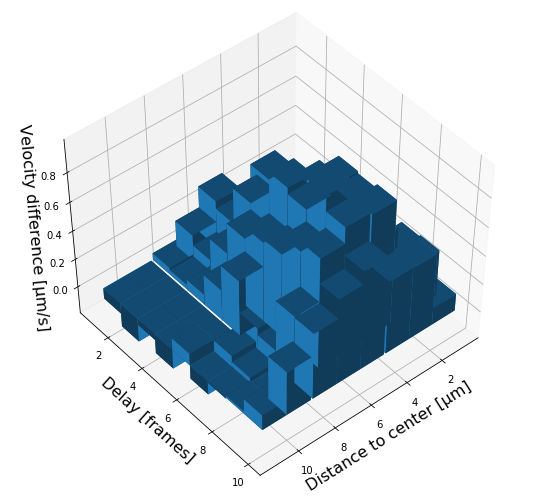

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121, projection='3d')

_x = radius2
_y = rangewave
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
top = alltogether[:,2]
bottom =np.zeros_like(top)
#plt.xticks([1.2,2.55],('1.2','2.55'))
#plt.yticks([1.2,2.55],('1.2','2.55'))
ax1.set_zlim(min(alltogether[:,2]),max(alltogether[:,2]))
xstep = radius2[1] - radius2[0]
ystep = rangewave[1] - rangewave[0]
ax1.set_xlabel('Distance to center [µm]',fontsize=16)
ax1.set_ylabel('Delay [frames]',fontsize=16)
ax1.set_zlabel('Velocity difference [µm/s]',fontsize=16)
ax1.bar3d(x, y,bottom, xstep,ystep,top, shade=True,alpha=1)
#ax1.view_init(10, 50)
ax1.view_init(50, 50)
plt.tight_layout()
plt.show()

In [22]:
output = np.zeros((maxlength*num,7))
count = 0
for i in range(maxlength):
    for j in range(num):
        output[count,0] = alltogether[count,1]     #Frames
        output[count,1] = alltogether[count,3]     #Delay
        output[count,2] = alltogether[count,0]     #Distance
        output[count,3] = alltogether[count,5]     #Density
        output[count,4] = alltogether[count,6]     #Normalized Density
        output[count,5] = alltogether[count,2]     #Velocity difference
        output[count,6] = alltogether[count,4]     #Drift difference
        count += 1      
np.savetxt('Output.txt', output,fmt='%1.6f')

9


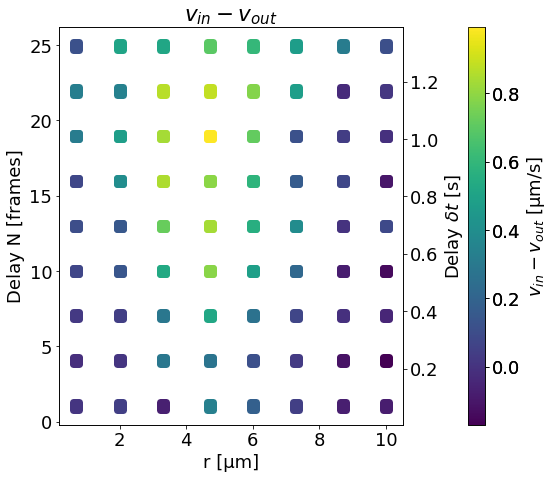

delay =  19.0  - shell =  4.7  - max v difference =  0.993773


In [32]:
x = alltogether[:,0]
y = alltogether[:,1]
v = alltogether[:,2]
y2 = alltogether[:,3]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('r [µm]')
ax.set_ylabel('Delay N [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay $\delta t$ [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('$v_{in} - v_{out}$')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.9)
cax2 = divider2.append_axes("right", size="5%", pad=0.9)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('$v_{in} - v_{out}$ [µm/s]')
plt.tight_layout()
plt.savefig('vdifference.pdf', format='pdf')
plt.show()

for i in range(maxlength*len(rangewave)):
    if alltogether[i,2] == max(alltogether[:,2]):        
        print('delay = ',alltogether[i,1],' - shell = ',alltogether[i,0],' - max v difference = ',max(alltogether[:,2]))

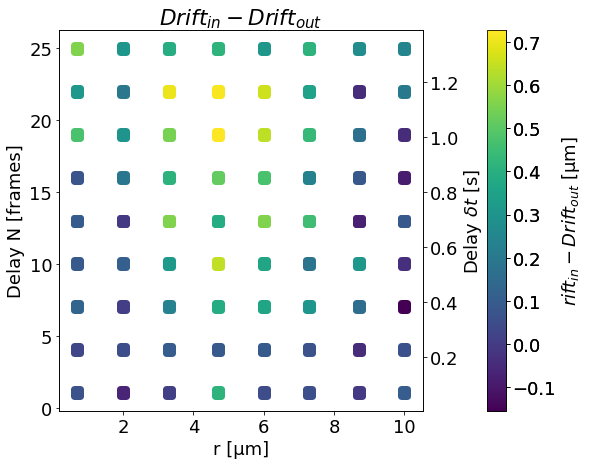

In [36]:
x = alltogether[:,0]
y = alltogether[:,1]
v = alltogether[:,4]
y2 = alltogether[:,3]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('r [µm]')
ax.set_ylabel('Delay N [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay $\delta t$ [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('$Drift_{in} - Drift_{out}$')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.9)
cax2 = divider2.append_axes("right", size="5%", pad=0.9)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('$rift_{in} - Drift_{out}$ [µm]')
plt.savefig('Driftdifference.pdf', format='pdf')
plt.show()

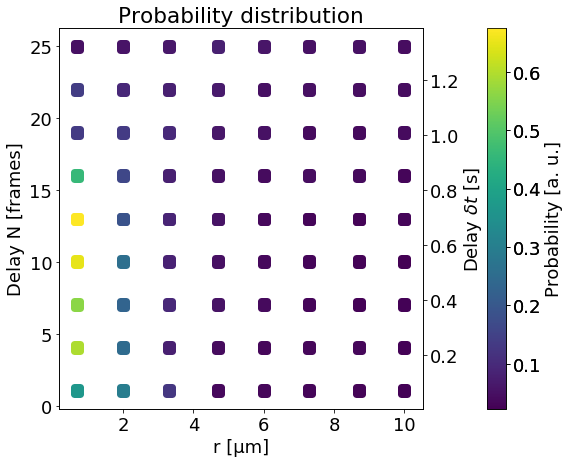

delay =  13.0  - shell =  0.7  - max density =  0.674156


In [40]:
x = alltogether[:,0]
y = alltogether[:,1]
v = alltogether[:,5]
y2 = alltogether[:,3]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('r [µm]')
ax.set_ylabel('Delay N [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay $\delta t$ [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Probability distribution')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.9)
cax2 = divider2.append_axes("right", size="5%", pad=0.9)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Probability [a. u.]')
plt.savefig('Density.pdf', format='pdf')
plt.show()

for i in range(maxlength*len(rangewave)):
    if alltogether[i,5] == max(alltogether[:,5]):        
        print('delay = ',alltogether[i,1],' - shell = ',alltogether[i,0],' - max density = ',max(alltogether[:,5]))

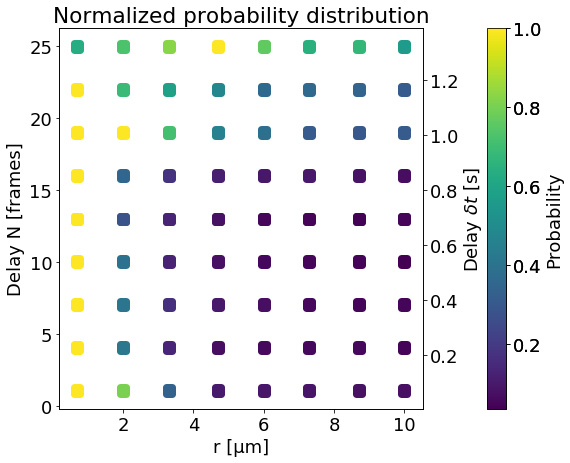

In [42]:
x = alltogether[:,0]
y = alltogether[:,1]
v = alltogether[:,6]
y2 = alltogether[:,3]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('r [µm]')
ax.set_ylabel('Delay N [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay $\delta t$ [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Normalized probability distribution')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.9)
cax2 = divider2.append_axes("right", size="5%", pad=0.9)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Probability')
plt.savefig('NormDensity.pdf', format='pdf')
plt.show()